In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.describe()
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
#to check for null values 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
#standardization of the dataset
for col in df.columns:
    df[col]=(df[col]-np.mean(df[col]))/np.std(df[col])
    
#columns 0 till 10 are independent variables
#slicing done so that row data pertaining to columns 0 to 10 is stored in idv    
idv=df.iloc[0:,0:11]

#the column at 11 index is dependent variable
dv = df.iloc[0:,11:]

In [6]:
#idv gets divided between x_train and x_test
#dv gets divided between y_train and y_test
#divison is done in ratio of 80:20 as given by test_size
#random_state is the index according to which our dataset is 
#sorted
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(idv,dv,test_size=0.2)
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1266,-0.643266,0.235635,-1.134720,-0.169427,-0.137438,0.011961,-0.318315,-0.586555,0.446337,-0.343154,-0.115441
800,-0.643266,0.459094,-0.980669,1.036685,-0.116184,0.968269,1.871131,-0.178445,-0.395969,-0.874272,-0.960246
824,-0.700719,-0.267148,0.046341,0.185312,-0.413736,-0.944346,-0.926494,0.038861,-0.460762,-0.756246,-0.115441
810,-0.585813,-0.211283,-0.877968,0.043416,-0.413736,-1.135608,-0.987312,-0.597155,-0.072005,-1.110324,0.072294
754,-0.298547,-0.267148,2.100359,-0.595114,6.961305,-0.179300,-0.439951,-0.098943,-1.432654,2.371447,-1.241848
...,...,...,...,...,...,...,...,...,...,...,...
560,2.516652,0.403229,1.124700,0.185312,-0.264960,-1.039977,-0.835267,1.406296,-1.108690,-0.520193,0.917099
1176,-1.045437,1.967442,-1.237421,2.171850,-0.179946,0.681377,0.016184,-0.544154,1.742192,-0.933285,0.729364
1292,-1.390155,-0.741999,-0.723916,-0.098479,-0.668781,-0.179300,-0.561586,-1.657183,2.001364,0.069937,1.855771
672,0.850513,3.978574,0.354443,-0.382271,-0.179946,1.542054,3.178716,0.664277,-1.043897,-0.756246,-0.866379


In [7]:
#stores pearson's correlation coefficient for each independent variable
pcc=[]
#pcc values lies b/w -1 and 1(both inclusive)
#for feature selection I took predictor features with 
#absolute values of pearson correlation coefficient
#higher than a threshold
for col in x_train.columns:
    val=np.corrcoef(x_train[col],y_train['quality'])[0][1]
    pcc.append((val,col))
    
#stores the absolute pcc values    
# abs_pcc=[]

# for i,tag in pcc:
#     abs_pcc.append((abs(i),tag))
    
#sorting pcc values in descending order
sorted(pcc,reverse=True)

#threshold value for pcc
threshold=0.15

for i,tag in pcc:
    if i<threshold:
        x_train.drop(tag,axis=1,inplace=True)
x_train.describe()

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,citric acid,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000
mean,0.024299,0.008156,-0.012412
std,1.004677,0.993408,0.992779
min,-1.391472,-1.936507,-1.898919
25%,-0.877968,-0.638220,-0.866379
50%,-0.056360,-0.225128,-0.303175
75%,0.816598,0.424016,0.635497
max,3.743574,7.918677,4.202453


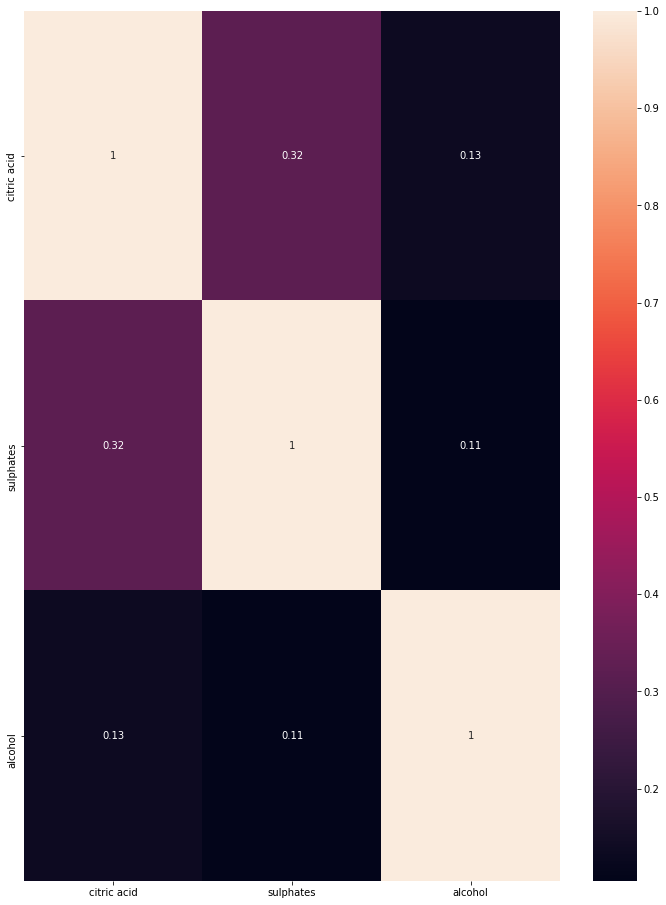

In [8]:
plt.figure(figsize=(12,16))
sns.heatmap(x_train.corr(),annot=True)

In [9]:
# idv_table= x_train.corr()
# i=0
# features=set()
# for r in idv_table.index:
#     for c in idv.columns[i+1:]:
#         if abs(idv_table[r][c])>=0.65 and r!=c:
#             if features and c in features:
#                 features.remove(c)
#         elif abs(idv_table[r][c]<0.65) and r!=c:
#             features.add(c)
#     i+=1
# print(features)
# for col in idv.columns:
#     if col not in features:
#         x_train.drop(col,axis=1)
# x_train

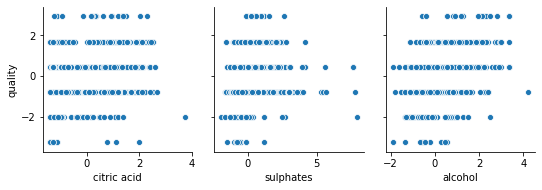

In [10]:
#the scatter plots show that among these variables there is very less linear correlation
#the plots show that there is randomness and linear regression is not the go to method
sns.pairplot(df,x_vars=['citric acid','sulphates','alcohol'],y_vars=['quality'])

In [11]:
#total sum of squares
#when considering only dependent variables, sse = sst
ymean=np.mean(y_train)
sst=0
for i in range(len(y_train['quality'])):
    sst=np.sum((y_train-ymean)**2) 
sst

quality    1245.640408
dtype: float64

## Gradient descent

Parameters Found:
 [[-0.00968641]
 [ 0.20835128]
 [ 0.46680333]
 [-0.00968641]]
accuracy in %:  quality    28.044546
dtype: float64


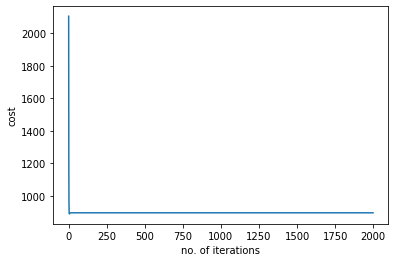

In [12]:
# y = mx+c
def optimize_loss(x,y,alpha,epoch):
    n=y.shape[0]
    m=x.shape[1]
    b=np.ones((m,1))
    h=x.dot(b)
    cost=[]
    min_cost=None
    b_new=[]
    for i in range(epoch):
        b0_derivative = (-2/n)*(np.sum(y-h)) #outside the loop because its derivative has no x values
        b[0] = b[0]-alpha*b0_derivative
        for j in range(1,m):
            newx=x[:,j].reshape(n,1)
            b_derivative = (-2/n)*(np.sum((y-h)*(newx)))#jth feature all rows considered
            b[j] = b[j]-alpha*b_derivative 
        h=np.dot(x,b)
        newCost=np.sum((y-h)**2)
        newCost=np.array(newCost)
        if min_cost is None or min_cost > newCost:
            min_cost=newCost
            b_min=b
        cost.append(newCost)
    return cost,b_min

def CalculateAccuracy(x,y,sst):
    h = x_train.dot(b)
    sse =np.sum(((y_train-h)**2))
    r2= 1 - sse/sst
    return(r2*100)

def plotCost(cost):
    plt.plot(cost)
    plt.xlabel('no. of iterations')
    plt.ylabel('cost')

ones=np.ones((y_train.shape[0],1))
x_train=np.concatenate((x_train,ones),axis=1)

alpha = 0.2
epoch =2000

#initializing an empty numpy array
b=np.empty((x_train.shape[1]+1,1))

cost,b = optimize_loss(x_train,y_train,alpha,epoch)

accuracy = CalculateAccuracy(x_train,y_train,sst)
print('Parameters Found:\n',b)

print('accuracy in %: ',accuracy)
plotCost(cost)